# Dealing with imbalanced data

Class Imbalance is a common problem in machine learning, especially in classification problems. Imbalance data can hamper our model accuracy big time. It appears in many domains, including fraud detection, spam filtering, disease screening, SaaS subscription churn, advertising click-throughs, etc. Let’s understand how to deal with imbalanced data in machine learning.

Roughly 97% of the training dataset is classified as 0, which means no claims, and only about 3% of the data is classified as 1, indicating claims.

So, what we actually hope for is:

In the training dataset, we have more positive instances, meaning more 1s, more data where claims occur. This way, we can better predict positive instances when inputting new data.

### Why we don't like imbalanced data?

Most machine learning algorithms work best when the number of samples in each class is about equal. This is because most algorithms are designed to maximize accuracy and reduce errors.

However, if the dataframe has imbalanced classes, then In such cases, you get a pretty high accuracy just by predicting the majority class, but you fail to capture the minority class, which is most often the point of creating the model in the first place. For example, if the class distribution shows that 99% of the data has the majority class, then any basic classification model like the logistic regression or decision tree will not be able to identify the minor class data points.

In [ ]:
import numpy as np
import pandas as pd

from collections import Counter

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,12)
plt.style.use('ggplot')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

from sklearn.metrics import roc_curve, roc_auc_score

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

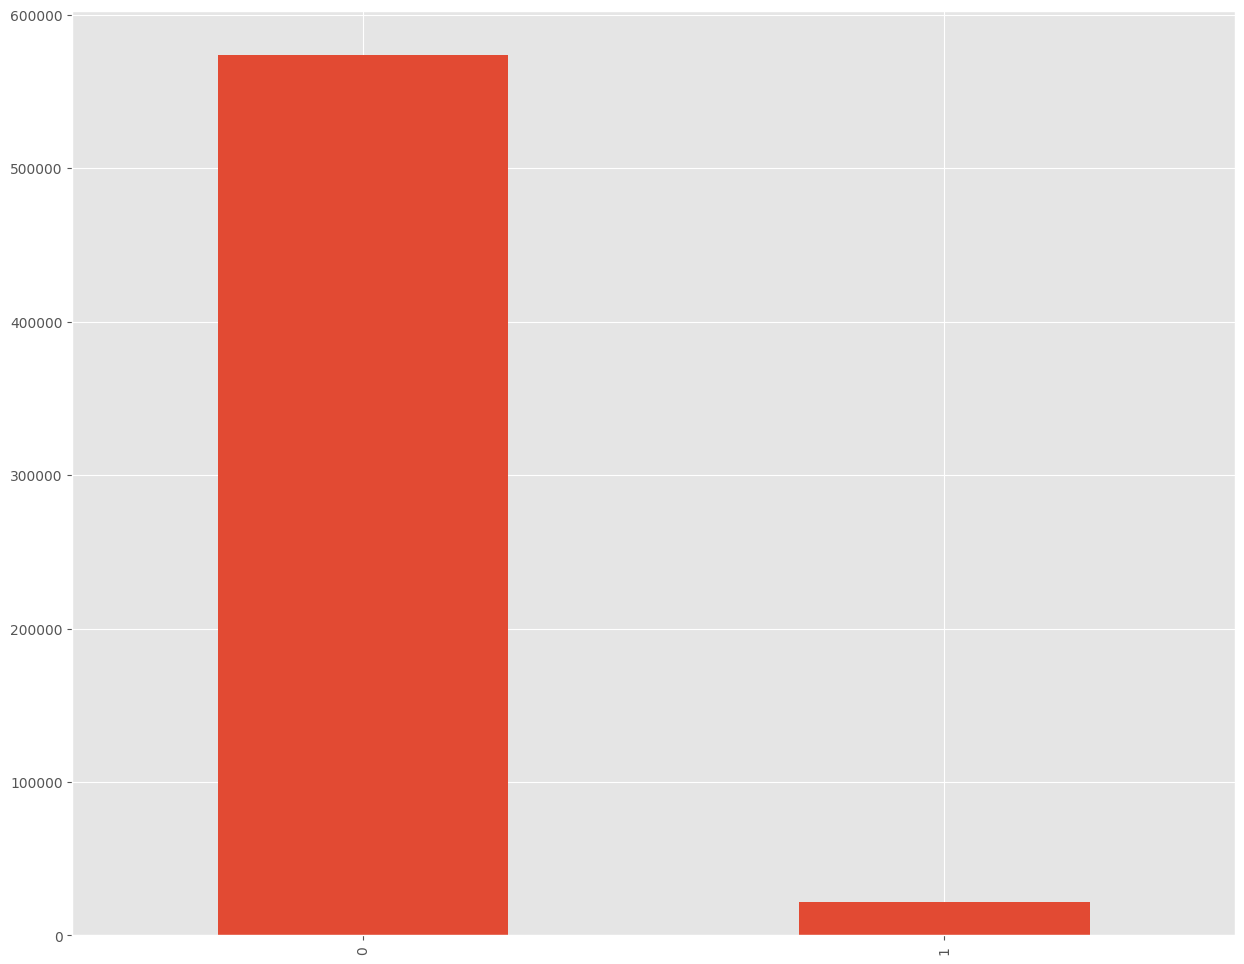

In [ ]:
train = pd.read_csv('train.csv')

target_count = train.target.value_counts()
print('Not filing a claim:', target_count[0])
print('Filing a claim,:', target_count[1])
print('Ratio:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar');

You can see the ratio of positive to negative classes is approximately 1 to 26, indicating that our positive examples are very rare. This is indeed the case in the insurance industry, where claims are infrequent. This is a common problem in risk control projects, and we often encounter such situations. Such data is not very friendly to typical machine learning algorithms. Why do we say this?

For example, if we don't preprocess the data at all and directly use sklearn's Logistic Regression for classification, let's see the results

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# remove id and target
features = train.columns[2:]

X = train[features]
y = train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1996)

model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.34%


Wow! Our accuracy has already reached 96.34%.

But is reality really as perfect as this number suggests?

So, if I randomly select a feature, let's say 'ps_calc_02,' and try to predict, what would be the accuracy?

In [ ]:
model.fit(X_train[['ps_calc_02']], y_train)
y_pred = model.predict(X_test[['ps_calc_02']])

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.34%


It's still 96.34%, which indicates that such a high accuracy is actually an illusion, a misconception. In cases of extreme class imbalance, we can't solely rely on accuracy to measure the quality of a classification model.

You can see that the precision for '1' is 0, indicating that we haven't predicted any positive instances at all

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114686
           1       0.00      0.00      0.00      4357

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043



Let's take a look at the ROC-AUC. You can see that this model is completely ineffective

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

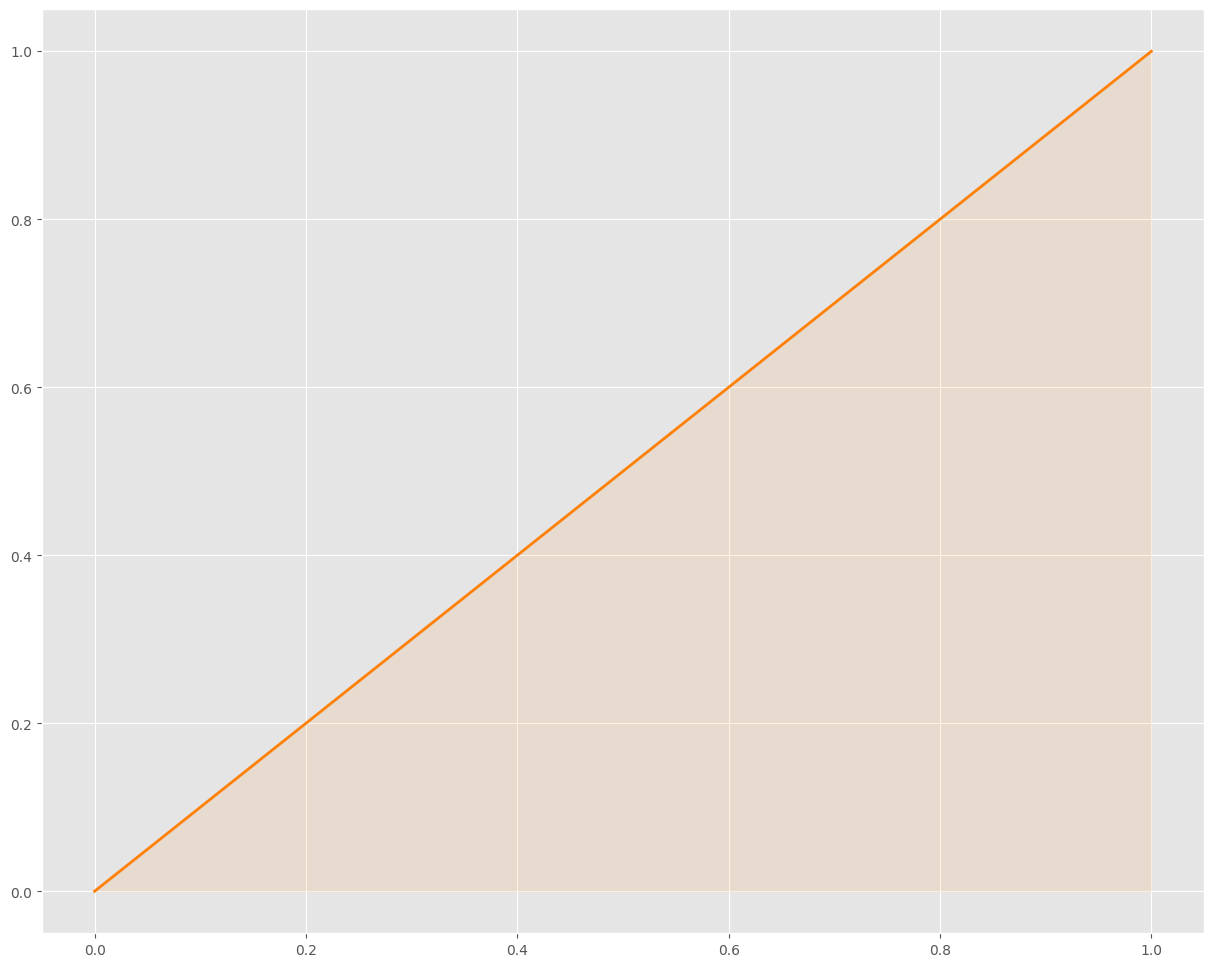

In [ ]:
aucroc = roc_auc_score(y_test, y_pred)
fpr, tpr, t = roc_curve(y_test, y_pred)
fig, ax = plt.subplots(nrows=1,ncols=1, sharey=True)

ax.plot([0]+fpr.tolist(), [0]+tpr.tolist(), lw = 2, color = '#fe8006')
ax.fill_between([0]+fpr.tolist(), [0]+tpr.tolist(), color = '#fe8006', alpha=0.1)

# Methods for Handling Imbalanced Class Data

## Resampling

The simplest implementation of resampling includes:

- undersampling
- oversampling

<img src="https://pic.imgdb.cn/item/621873142ab3f51d9152bcda.jpg">

### Random under-sampling

Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.

In [ ]:
# Class count
count_class_0, count_class_1 = train.target.value_counts()

# Divide by class
df_class_0 = train[train['target'] == 0]
df_class_1 = train[train['target'] == 1]

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

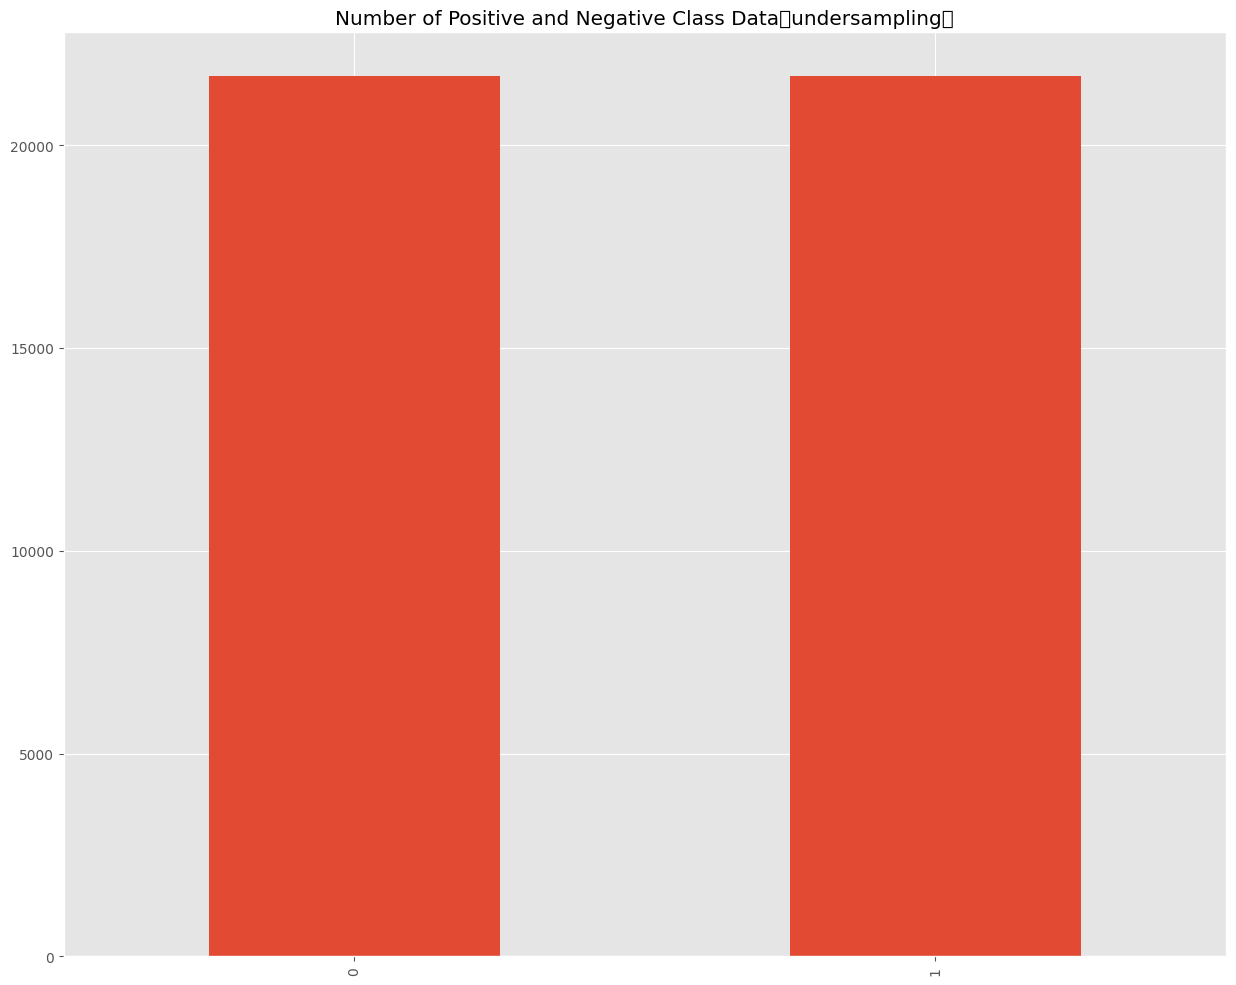

In [ ]:
df_class_0_undersampling = df_class_0.sample(count_class_1)
df_undersampling = pd.concat([df_class_0_undersampling, df_class_1], axis=0)

print('Random under-sampling:')
print(df_undersampling.target.value_counts())

df_undersampling.target.value_counts().plot(kind='bar', title='Number of Positive and Negative Class Data（undersampling）');

### Random over-sampling

Oversampling can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.

A con to consider when undersampling is that it can cause overfitting and poor generalization to your test set.

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

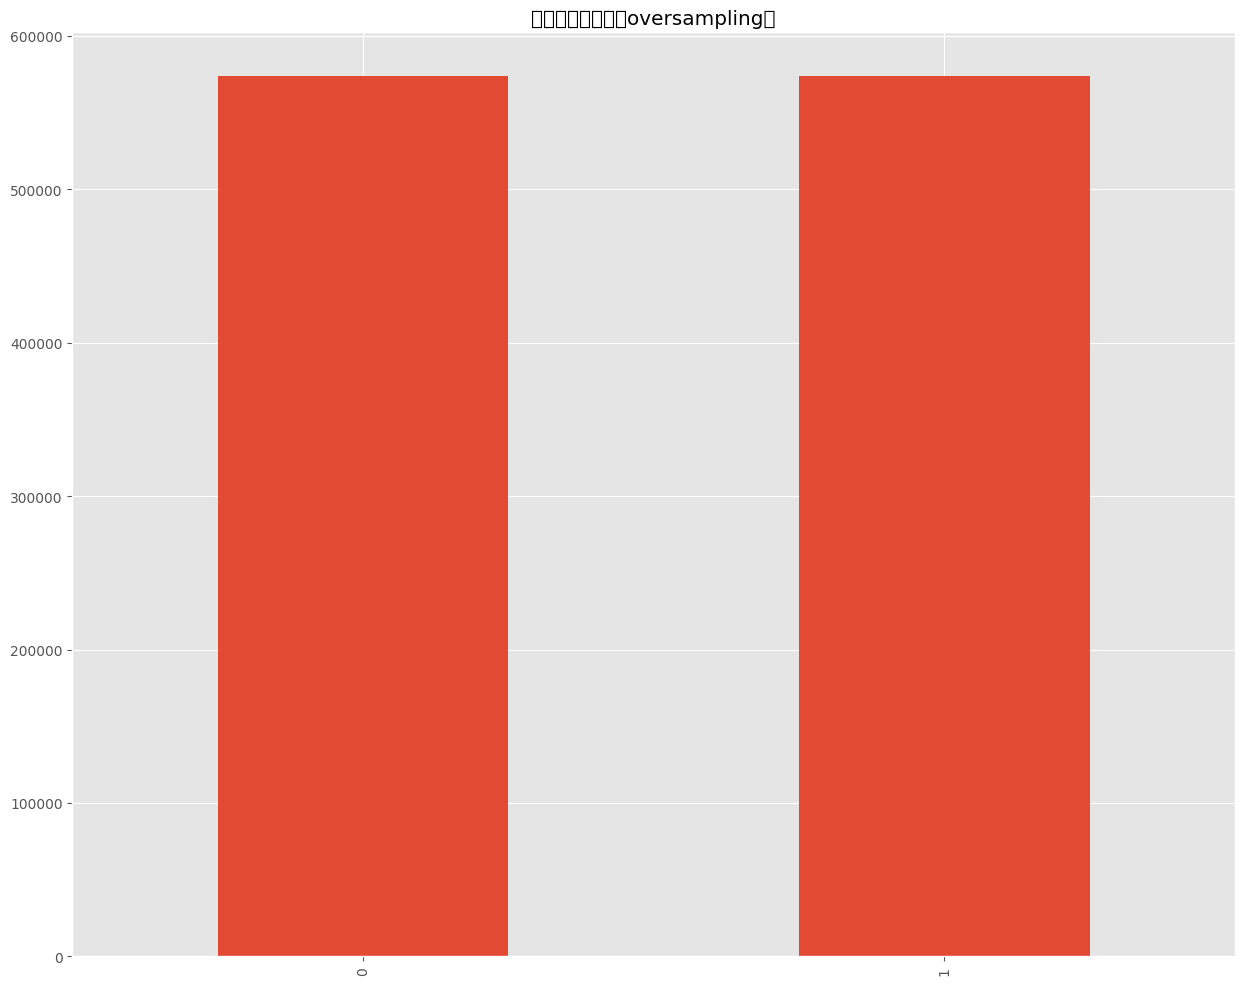

In [ ]:
df_class_1_oversampling = df_class_1.sample(count_class_0, replace=True)
df_oversampling = pd.concat([df_class_0, df_class_1_oversampling], axis=0)

print('Random over-sampling:')
print(df_oversampling.target.value_counts())

df_oversampling.target.value_counts().plot(kind='bar', title='正负类别数据量（oversampling）');

## Balance Data With the Imbalanced-Learn Python Module

A number of more sophisticated resampling techniques have been proposed in the scientific literature.

For example, we can cluster the records of the majority class and do the under-sampling by removing records from each cluster, thus seeking to preserve information. In over-sampling, instead of creating exact copies of the minority class records, we can introduce small variations into those copies, creating more diverse synthetic samples.

Let’s apply some of these resampling techniques using the Python library imbalanced-learn. It is compatible with scikit-learn and is part of scikit-learn-contrib projects.

In [ ]:
!pip install imblearn


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import imblearn

For visualization purposes, we will extract 100 samples from the training dataset.

In [ ]:
df_demo = train.copy().sample(100,random_state = 0)

features = df_demo.columns[2:]

X = df_demo[features]
y = df_demo['target']

In [ ]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#20beff', '#d80012']
    markers = ['o', '*']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m,
            s = 80
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

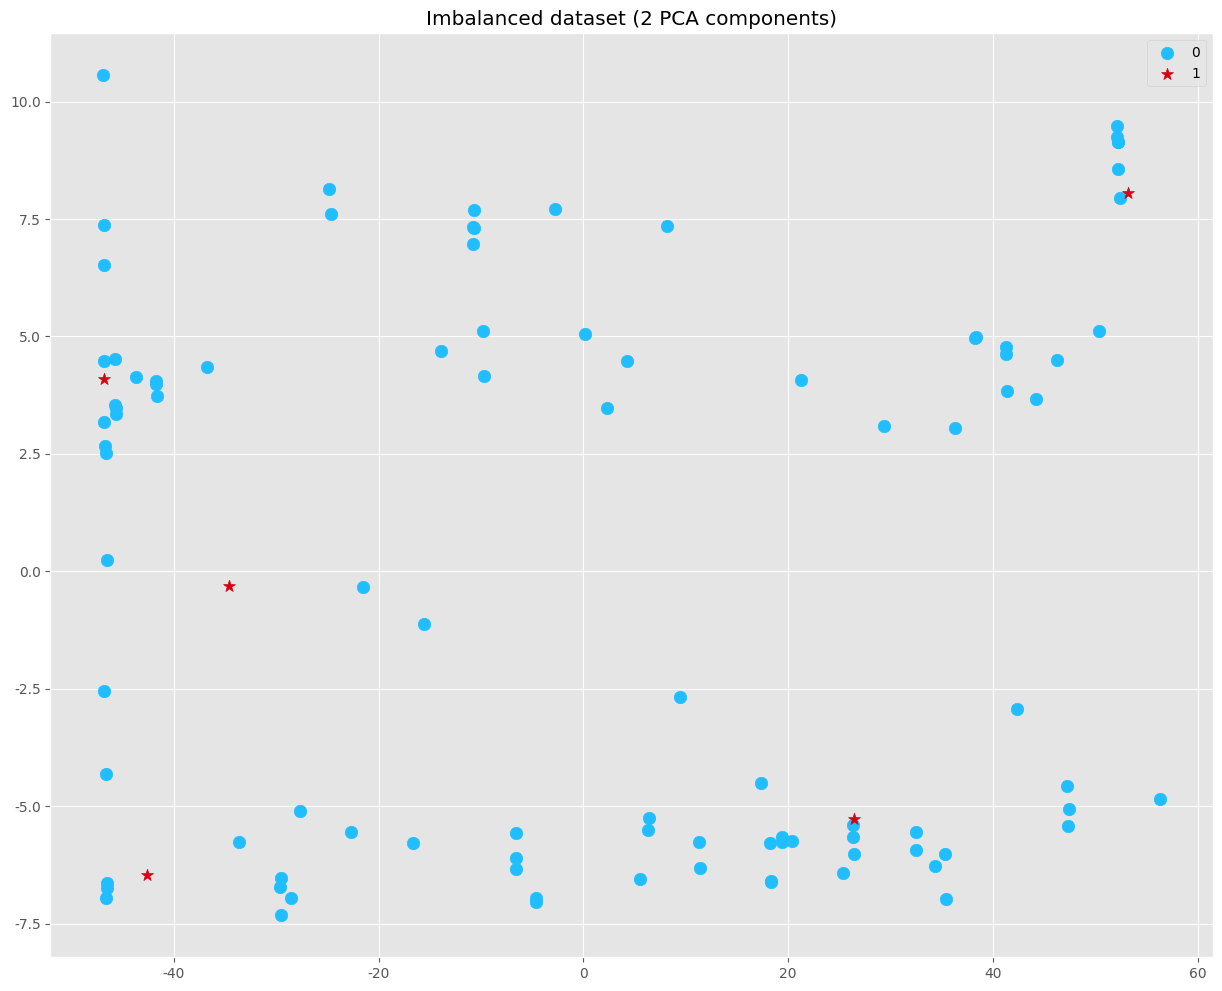

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

### Under-sampling

1.RandomUnderSampler
2.TomekLinks
3.EditedNearestNeighbours
4.RepeatedEditedNearestNeighbours
5.AllKNN
6.ClusterCentroids

#### 1.RandomUnderSampler

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

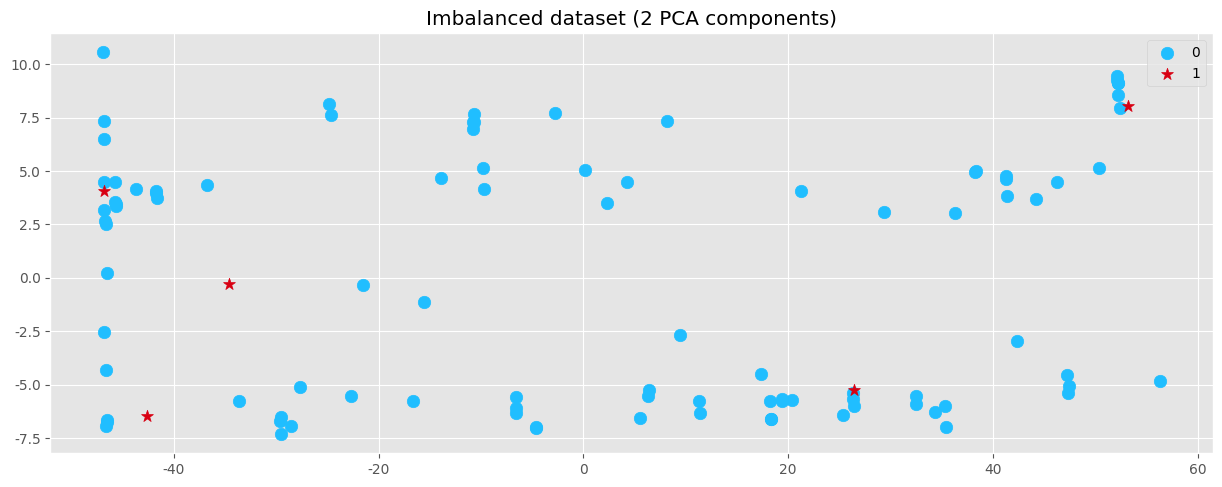

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

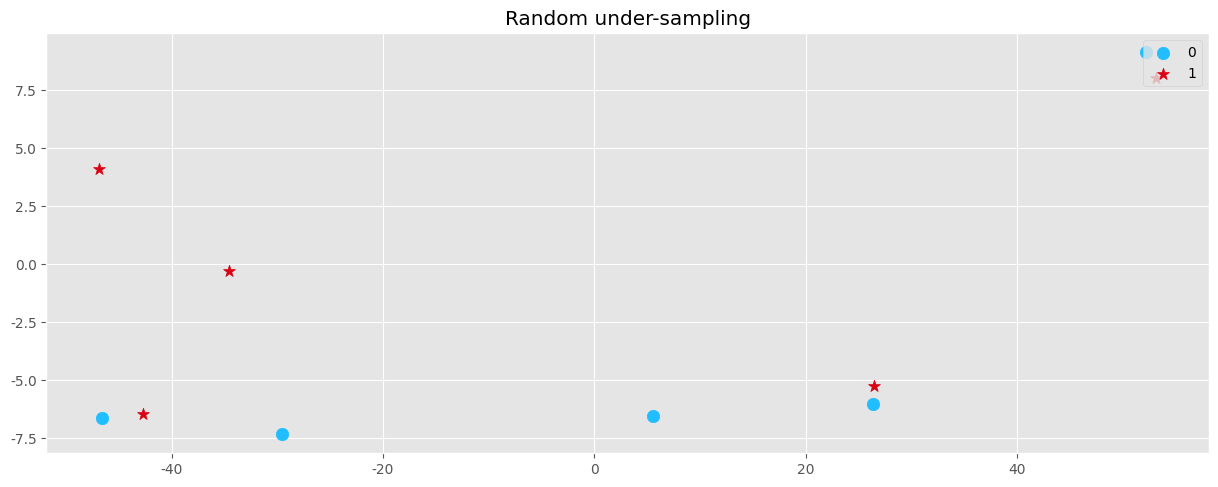

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=2022)
X_rus, y_rus = rus.fit_resample(X, y)
print(sorted(Counter(y).items()))
print(sorted(Counter(y_rus).items()))

plt.subplot(2,1,1)
plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')
plt.subplot(2,1,2)
plot_2d_space(X_rus, y_rus, 'Random under-sampling')

#### 2.Under-Sampling: Tomek Links


Tomek links are pairs of very close instances but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

Tomek’s link exists if the two samples are the nearest neighbors of each other.

<img src="image-20231107-153400.png" width="" align="" />

<div align=center>
<img src=https://imbalanced-learn.org/stable/_images/sphx_glr_plot_illustration_tomek_links_001.png width='400' />
</div>

参数 `sampling_strategy` 控制将删除链接的哪个样本。例如，默认值（即 sampling_strategy='auto'）将从多数类中删除样本。可以通过将 sampling_strategy 设置为“全部”来删除多数类和少数类的样本。该图说明了这种行为。

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

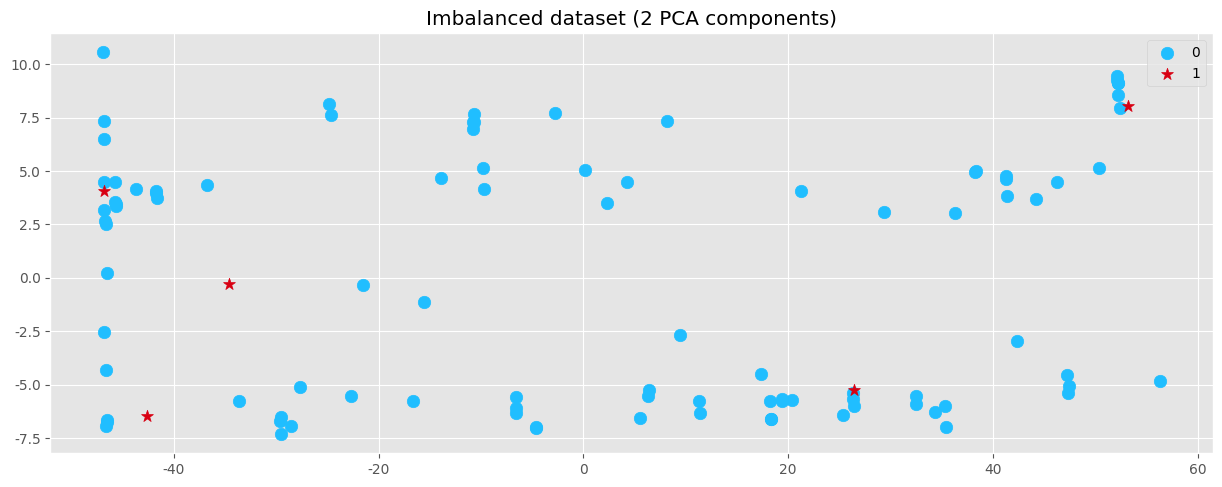

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

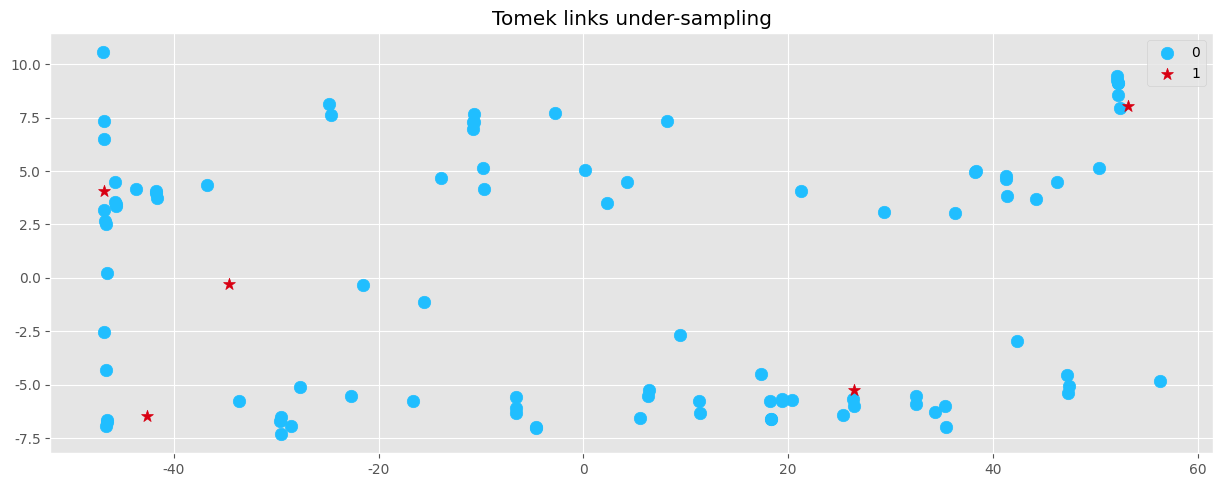

In [ ]:
from imblearn.under_sampling import TomekLinks


tl = TomekLinks(sampling_strategy = 'auto')
X_tl, y_tl = tl.fit_resample(X, y)
print(sorted(Counter(y).items()))
print(sorted(Counter(y_tl).items()))

plt.subplot(2,1,1)
plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')
plt.subplot(2,1,2)
plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

#### 3.Edited data set using nearest neighbours

'Edited Nearest Neighbors' applies nearest neighbor algorithm and 'edits' the dataset by removing samples that are not 'sufficiently' consistent with their neighborhood.

For each sample in the class to be undersampled, calculate the nearest neighbors and remove the sample if it does not meet the selection criteria.

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

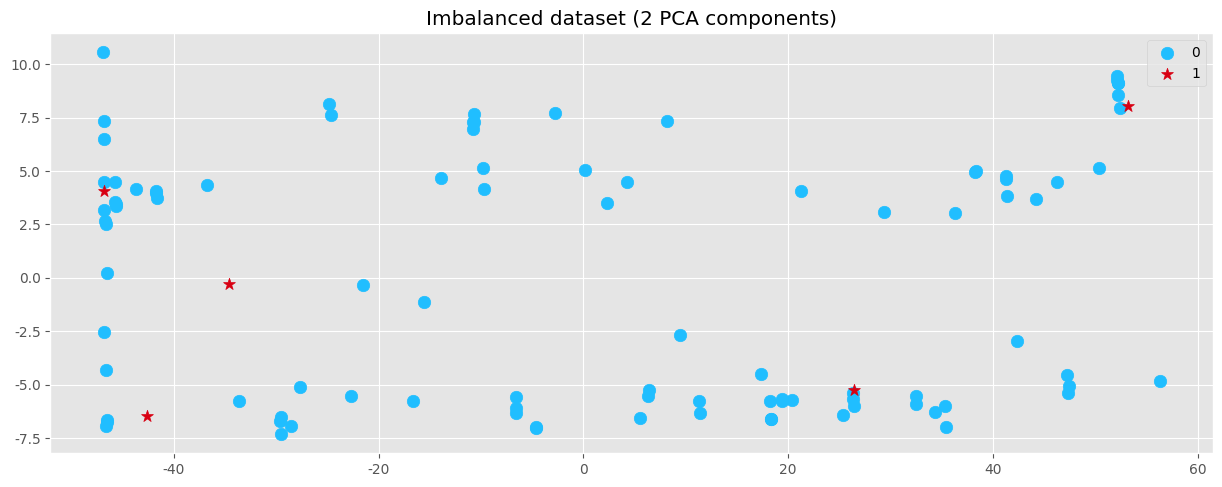

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

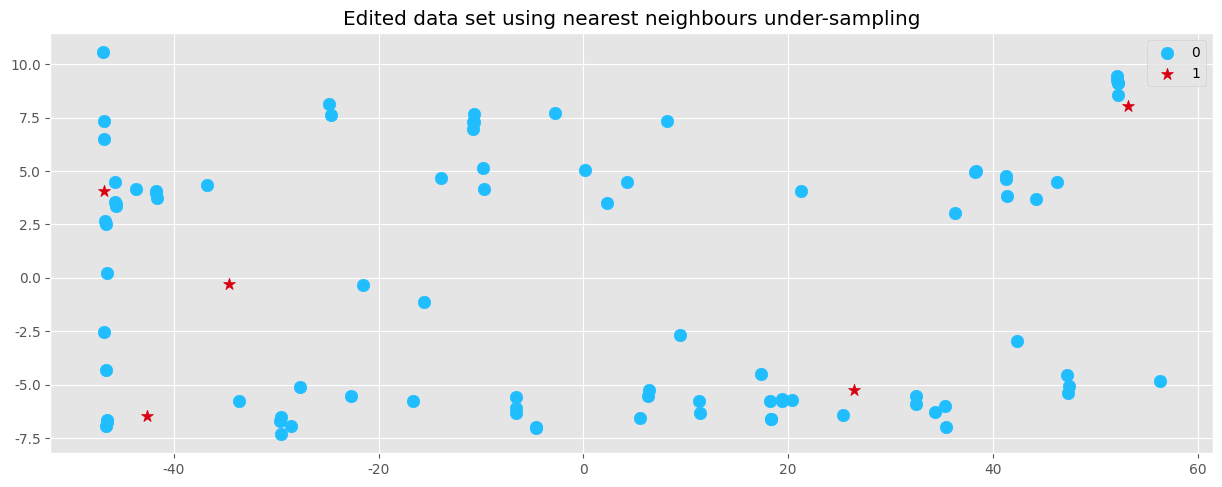

In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours


enn = EditedNearestNeighbours(sampling_strategy = 'auto',n_neighbors = 3)
X_enn, y_enn = enn.fit_resample(X, y)
print(sorted(Counter(y).items()))
print(sorted(Counter(y_enn).items()))

plt.subplot(2,1,1)
plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')
plt.subplot(2,1,2)
plot_2d_space(X_enn, y_enn, 'Edited data set using nearest neighbours under-sampling')

#### Repeated Edited data set using nearest neighbours

As an extension of the Edited dataset using nearest neighbors, we repeat this algorithm multiple times, resulting in the removal of even more data!

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

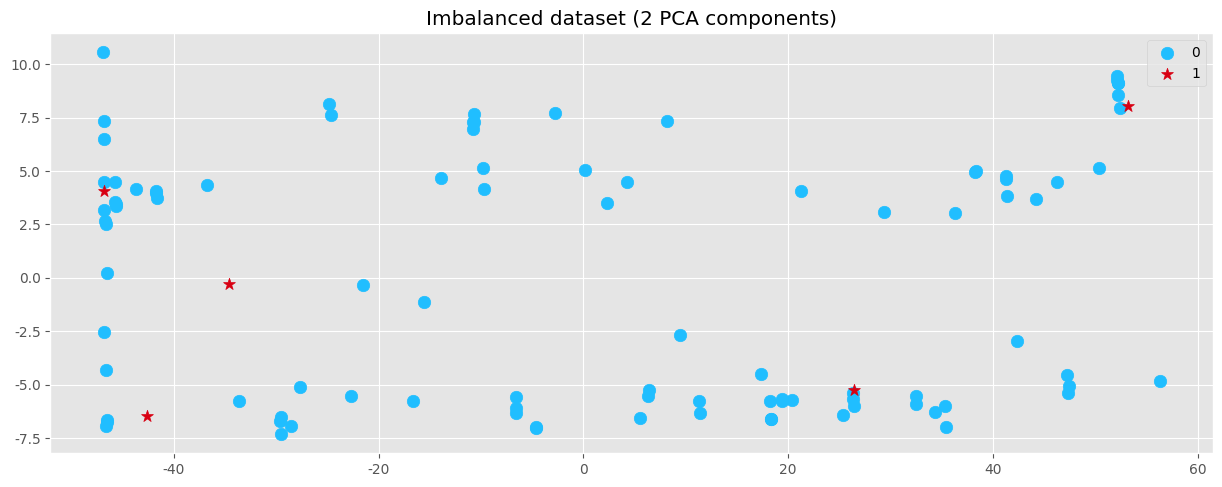

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

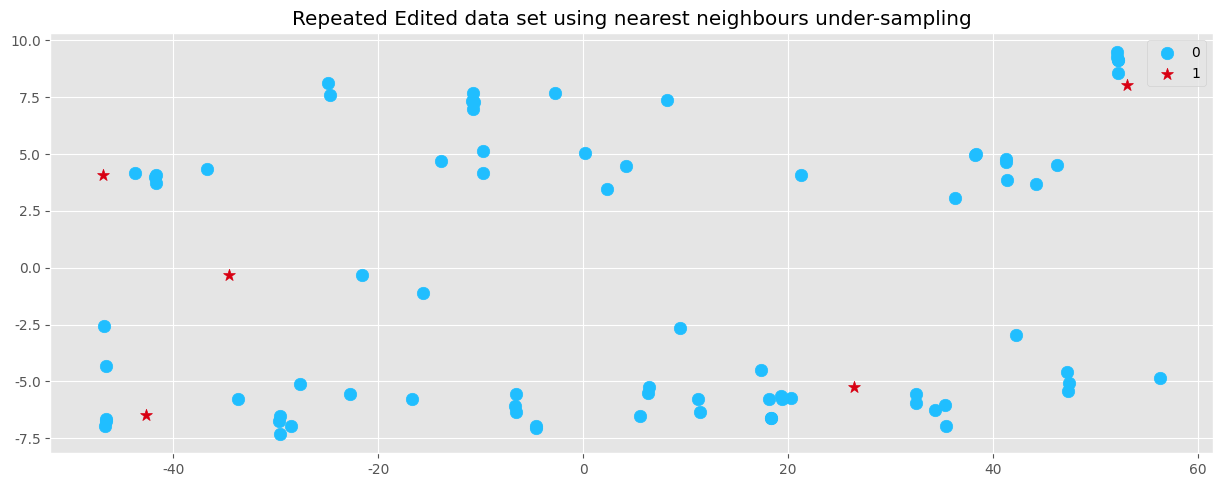

In [ ]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours


renn = RepeatedEditedNearestNeighbours(sampling_strategy = 'auto',n_neighbors = 3)
X_renn, y_renn = renn.fit_resample(X, y)
print(sorted(Counter(y).items()))
print(sorted(Counter(y_renn).items()))

plt.subplot(2,1,1)
plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')
plt.subplot(2,1,2)
plot_2d_space(X_renn, y_renn, 'Repeated Edited data set using nearest neighbours under-sampling')

#### 4.AllKNN

AllKNN, based on the previous Repeated Edited Nearest Neighbors, increases the number of neighbors at each iteration

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

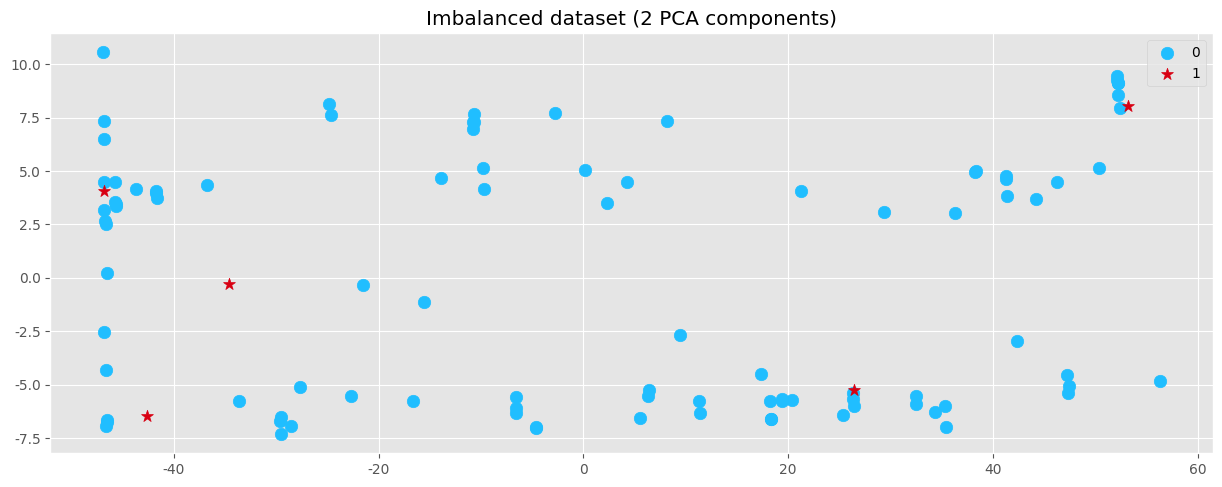

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

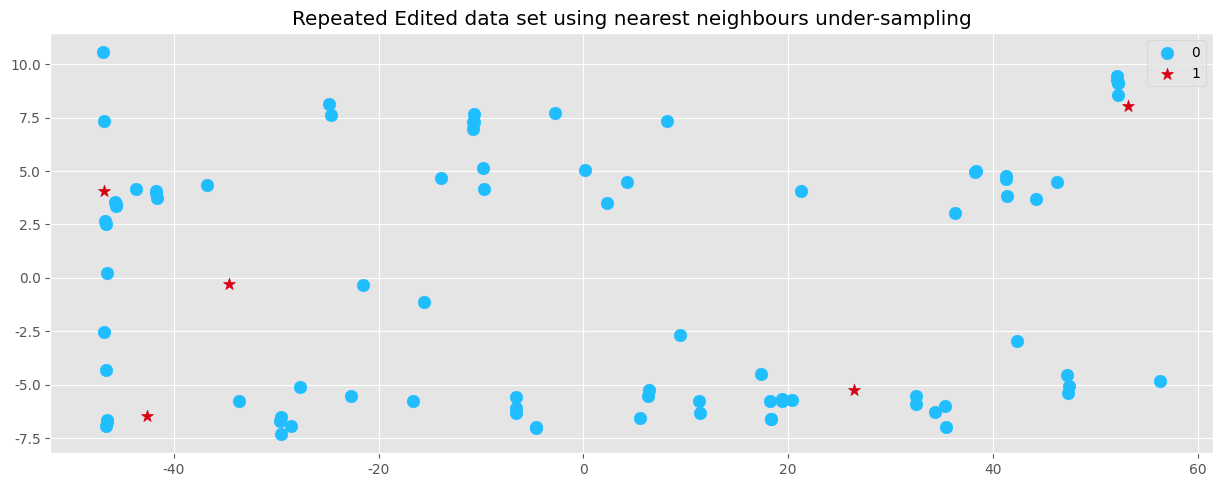

In [ ]:
from imblearn.under_sampling import AllKNN

allknn = AllKNN(sampling_strategy = 'auto',n_neighbors = 3)
X_allknn, y_allknn = allknn.fit_resample(X, y)
print(sorted(Counter(y).items()))
print(sorted(Counter(y_allknn).items()))

plt.subplot(2,1,1)
plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')
plt.subplot(2,1,2)
plot_2d_space(X_allknn, y_allknn, 'Repeated Edited data set using nearest neighbours under-sampling')

#### 5.Cluster Centroids

Undersampling is performed by generating centroids based on clustering methods. The data is first grouped by similarity to preserve information.

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

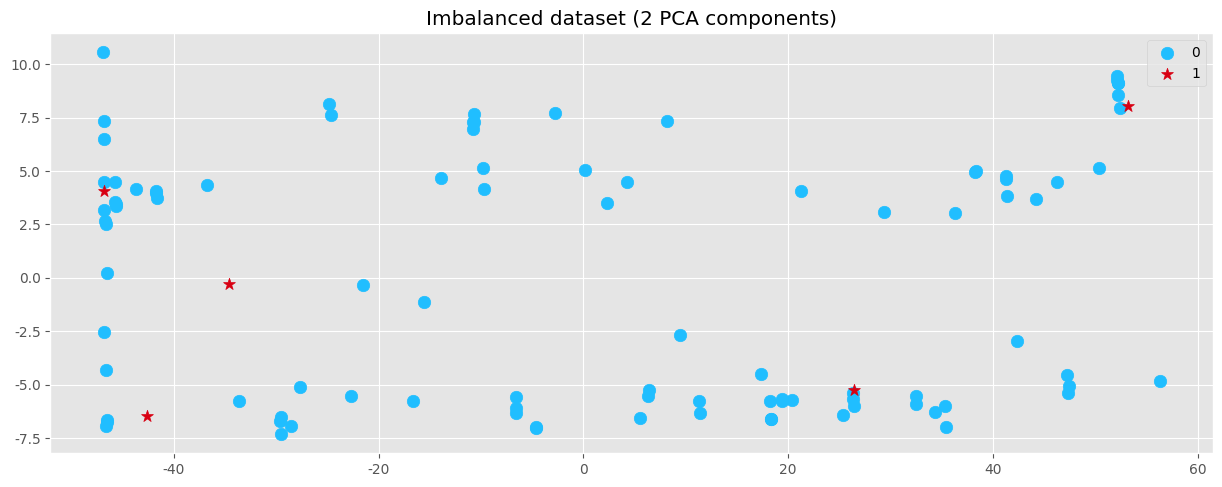

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

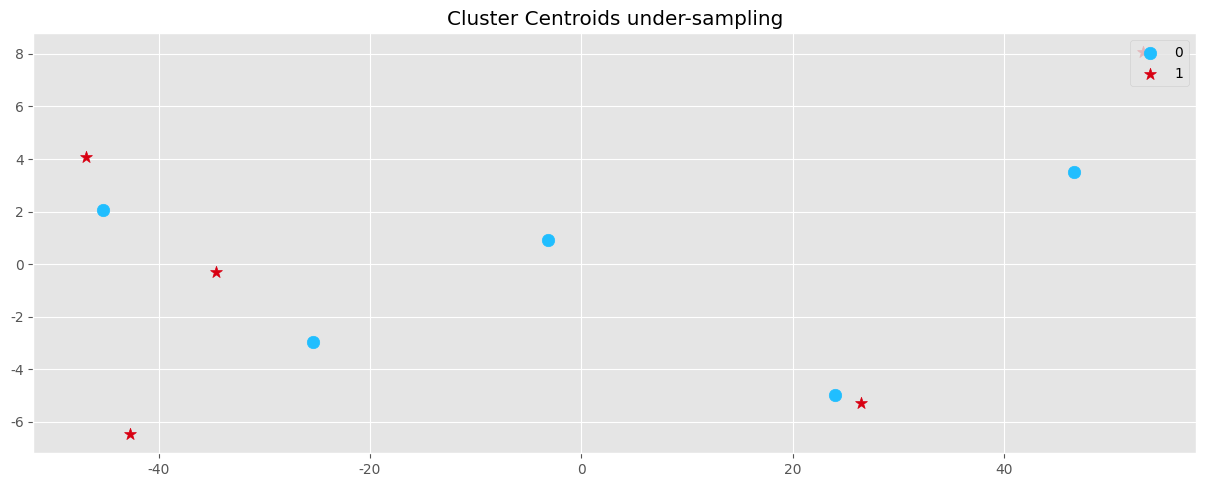

In [ ]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids()
X_cc, y_cc = cc.fit_resample(X, y)
print(sorted(Counter(y).items()))
print(sorted(Counter(y_cc).items()))

plt.subplot(2,1,1)
plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')
plt.subplot(2,1,2)
plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')

### Over-sampling

1.RandomOverSampler
2.SMOTE 
3.ADASYN

#### 1.RandomOverSampler

90 new random picked points
[(0, 95), (1, 5)]
[(0, 95), (1, 95)]


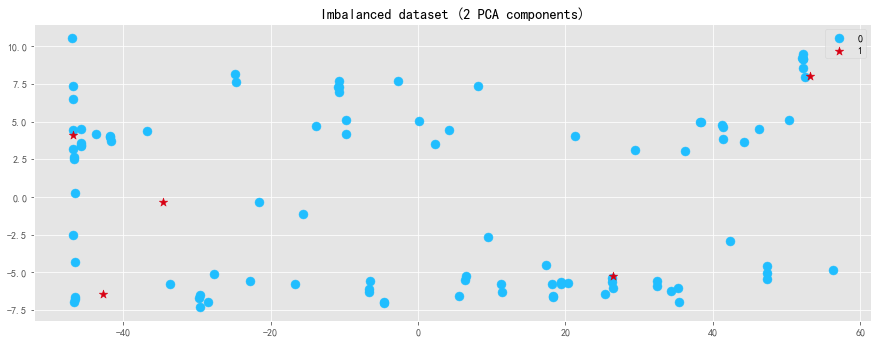

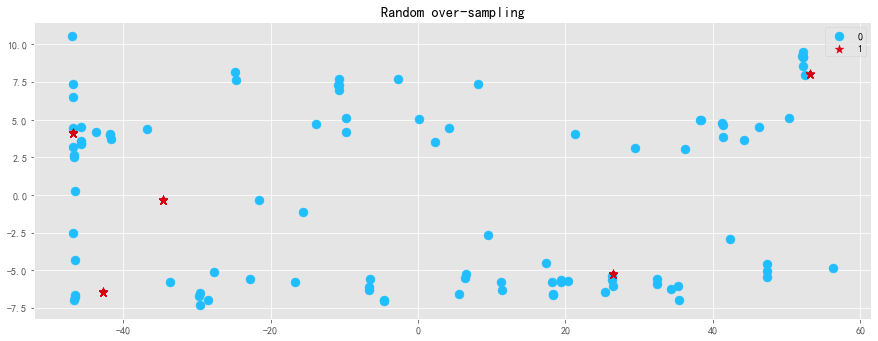

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')
print(sorted(Counter(y).items()))
print(sorted(Counter(y_ros).items()))

plt.subplot(2,1,1)
plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')
plt.subplot(2,1,2)
plot_2d_space(X_ros, y_ros, 'Random over-sampling')


#### 2.SMOTE

SMOTE（Synthetic Minority Oversampling TEchnique） first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.

---

> The combination of SMOTE and under-sampling performs better than plain under-sampling.

<div align=center>
<img src=https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/smote.png width='800' />
</div>

<div align=center>
<img src=https://www.datasciencecentral.com/wp-content/uploads/2021/10/2808332241.png width='600' />
</div>

In [ ]:
from imblearn.over_sampling import SMOTE,BorderlineSMOTE,SVMSMOTE,KMeansSMOTE 

smote = SMOTE(k_neighbors=3)
X_sm, y_sm = smote.fit_resample(X, y)

smote_border = BorderlineSMOTE(k_neighbors=3)
X_smbl, y_smbl = smote_border.fit_resample(X, y)

smote_svm = SVMSMOTE(k_neighbors=3)
X_smsvm, y_smsvm = smote_svm.fit_resample(X, y)


plt.subplot(4,1,1)
plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')
plt.subplot(4,1,2)
plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling【k neighbors=3】')
plt.subplot(4,1,3)
plot_2d_space(X_smbl, y_smbl, 'BorderlineSMOTE over-sampling【k neighbors=3】')
plt.subplot(4,1,4)
plot_2d_space(X_smsvm, y_smsvm, 'SVMSMOTE over-sampling【k neighbors=3】')

ModuleNotFoundError: No module named 'imblearn'

在处理连续特征和分类特征等混合数据类型时，所提出的方法（除了类随机过采样器）都不能处理分类特征。

这时候，我们应该使用`SMOTENC`来去对类别型变量做特殊的处理。

点击[这里](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTENC.html#imblearn.over_sampling.SMOTENC)查看详情。

#### 3.ADASYN
> SMOTE and ADASYN generate new samples in by interpolation. 

---

> ADASYN works similarly to the regular SMOTE. However, the number of samples generated for each x_i is proportional to the number of samples which are not from the same class than x_i in a given neighborhood. Therefore, more samples will be generated in the area that the nearest neighbor rule is not respected. The parameter m_neighbors is equivalent to k_neighbors in SMOTE.

[(0, 95), (1, 5)]
[(0, 95), (1, 95)]


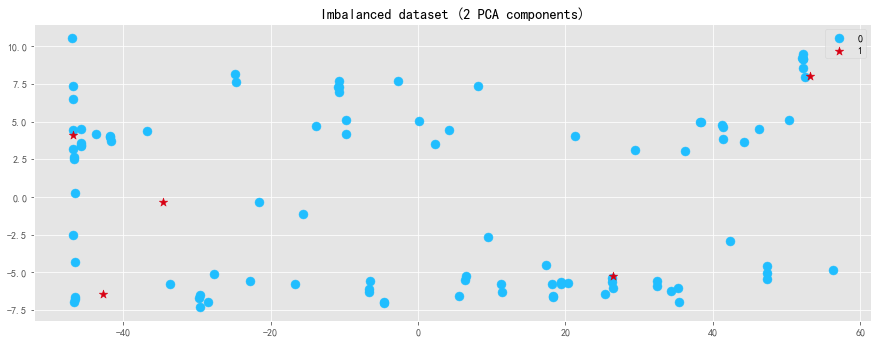

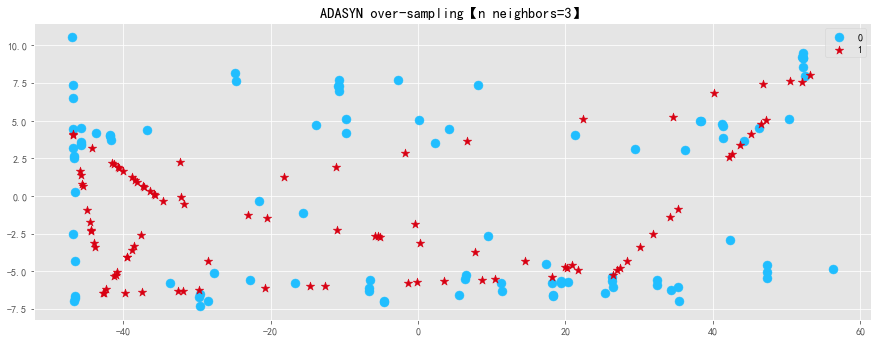

In [ ]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(n_neighbors = 3)
X_ada, y_ada = ada.fit_resample(X, y)

print(sorted(Counter(y).items()))
print(sorted(Counter(y_ada).items()))

plt.subplot(2,1,1)
plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')
plt.subplot(2,1,2)
plot_2d_space(X_ada, y_ada, 'ADASYN over-sampling【n neighbors=3】')

###  Combination of over- and under-sampling

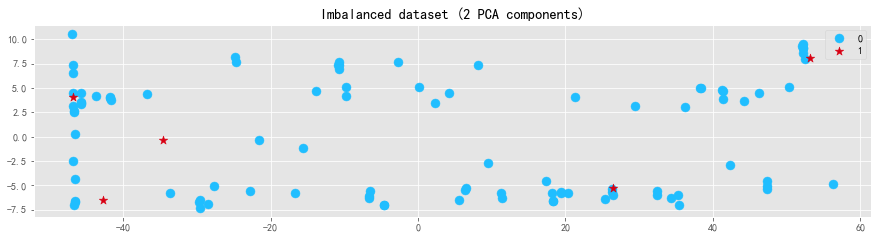

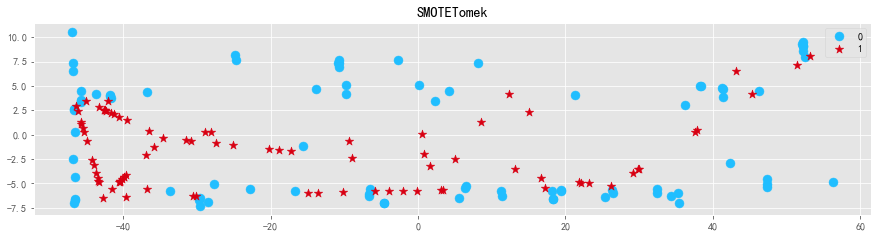

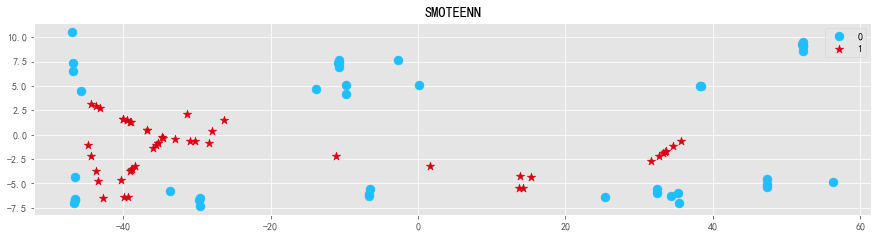

In [ ]:
from imblearn.combine import SMOTETomek,SMOTEENN
smote_tomek = SMOTETomek(random_state=0,smote = SMOTE(k_neighbors=3))
X_smtom, y_smtom = smote_tomek.fit_resample(X, y)

smote_enn = SMOTEENN(random_state=0,smote = SMOTE(k_neighbors=3))
X_smen, y_smen = smote_enn.fit_resample(X, y)

plt.subplot(3,1,1)
plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')
plt.subplot(3,1,2)
plot_2d_space(X_smtom, y_smtom, 'SMOTETomek')
plt.subplot(3,1,3)
plot_2d_space(X_smen, y_smen, 'SMOTEENN')

It can be seen that SMOTE-ENN is better at removing noisy samples than SMOTE-Tomek

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=185fc705-b61f-4bb6-be30-c3c88dd0b19b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>